# Worksheet 12

Name: Karla Vazquez

UID:U70624155

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Not a classfication task

2. Not a classification task

3. Yes it is

4. Not a classification task

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We can use the distance function (Euclidean) to find the closest match and predict based on that match.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is a model that isn't good on the training data and can't be generalized to predict new data. A warning sign is that k is too big, because that causes underfitting. Overfitting is when the model can predict the training data too well and this can make it so it can't predict new data correctly. Warning signs are that k is too small, because this causes overfitting.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

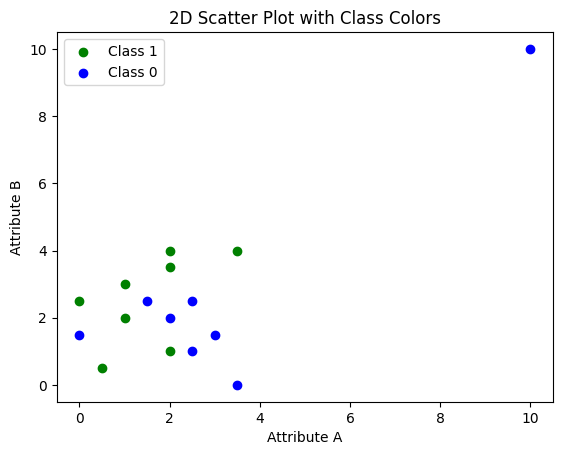

In [3]:
attribute_a = data["Attribute A"]
attribute_b = data["Attribute B"]
class_labels = data["Class"]

# Define colors for each class
colors = np.array([x for x in 'bgrcmyk'])

# Scatter plot with two different colors based on class labels
plt.scatter(np.array(attribute_a)[np.array(class_labels) == 1], np.array(attribute_b)[np.array(class_labels) == 1], c=colors[1], label='Class 1')
plt.scatter(np.array(attribute_a)[np.array(class_labels) == 0], np.array(attribute_b)[np.array(class_labels) == 0], c=colors[0], label='Class 0')

# Set plot labels and title
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('2D Scatter Plot with Class Colors')

# Show legend
plt.legend()

# Display the plot
plt.show()


Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, the point around (10, 10) in class 0 is an outlier. 

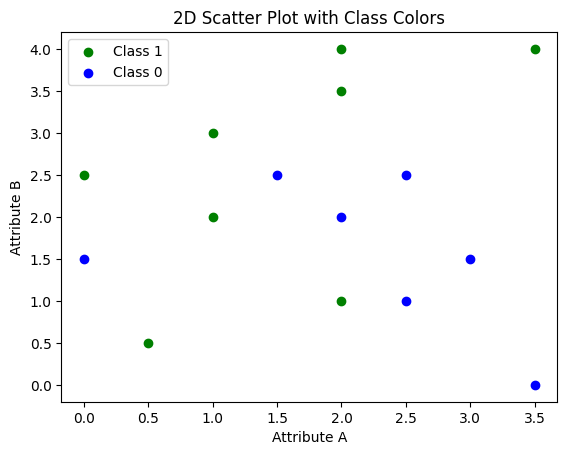

In [5]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}
attribute_a = data["Attribute A"]
attribute_b = data["Attribute B"]
class_labels = data["Class"]

# Define colors for each class
colors = np.array([x for x in 'bgrcmyk'])

# Scatter plot with two different colors based on class labels
plt.scatter(np.array(attribute_a)[np.array(class_labels) == 1], np.array(attribute_b)[np.array(class_labels) == 1], c=colors[1], label='Class 1')
plt.scatter(np.array(attribute_a)[np.array(class_labels) == 0], np.array(attribute_b)[np.array(class_labels) == 0], c=colors[0], label='Class 0')

# Set plot labels and title
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('2D Scatter Plot with Class Colors')

# Show legend
plt.legend()

# Display the plot
plt.show()


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

There are some points that can be considered noise, the points with an x value of 0 or the points with a y value of zero could be considered noise because they deviate from the mean x and y value.


For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

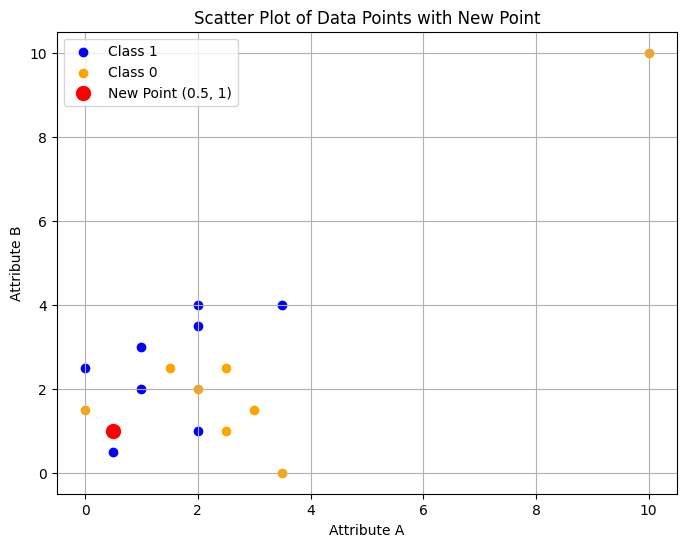

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

# Extracting data from the dictionary
attribute_a = data["Attribute A"]
attribute_b = data["Attribute B"]
class_labels = data["Class"]

# Point to be plotted in a different color
new_point = [0.5, 1]

# Scatter plot to visualize the data points
plt.figure(figsize=(8, 6))

# Plotting Class 1 data points in blue
plt.scatter(np.array(attribute_a)[np.array(class_labels) == 1], np.array(attribute_b)[np.array(class_labels) == 1], c='b', label='Class 1')

# Plotting Class 0 data points in orange
plt.scatter(np.array(attribute_a)[np.array(class_labels) == 0], np.array(attribute_b)[np.array(class_labels) == 0], c='orange', label='Class 0')


plt.scatter(new_point[0], new_point[1], color='r', s=100, label='New Point (0.5, 1)')

plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot of Data Points with New Point')
plt.legend()
plt.grid(True)
plt.show()



e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

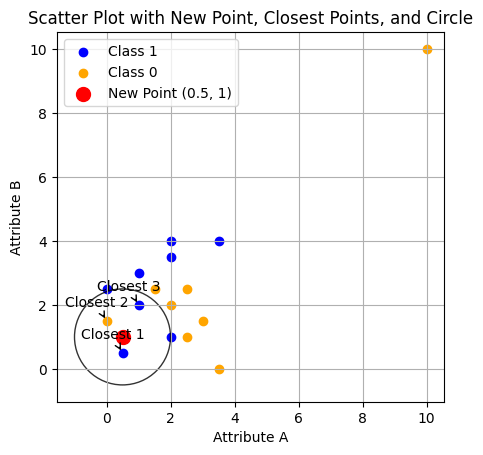

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def n_closest_to(example, n):
    distances = [euclidean_distance(example, [x, y]) for x, y in zip(data["Attribute A"], data["Attribute B"])]
    closest_indices = np.argsort(distances)[:n]
    closest_points = [(data["Attribute A"][i], data["Attribute B"][i]) for i in closest_indices]
    return closest_points

# Given point
location = (0.5, 1)
radius = 1.5  # Set a default radius for the circle

# Get the 3 closest points to the given location
closest_points = n_closest_to(location, 3)

# Plotting the data points and the new point
_, axes = plt.subplots()
axes.scatter(np.array(attribute_a)[np.array(class_labels) == 1], np.array(attribute_b)[np.array(class_labels) == 1], c='b', label='Class 1')

# Plotting Class 0 data points in orange
axes.scatter(np.array(attribute_a)[np.array(class_labels) == 0], np.array(attribute_b)[np.array(class_labels) == 0], c='orange', label='Class 0')


axes.scatter(new_point[0], new_point[1], color='r', s=100, label='New Point (0.5, 1)')

# Draw a circle centered around the new point with radius equal to the distance of the farthest of the three closest points
circle = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(circle)

# Mark the 3 closest points with text labels
for i, point in enumerate(closest_points):
    axes.annotate(f'Closest {i+1}', xy=point, xytext=(-30, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot with New Point, Closest Points, and Circle')
plt.legend()
plt.grid(True)
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [14]:
import numpy as np

def n_closest_to(example, n, data):
    distances = [euclidean_distance(example, [x, y]) for x, y in zip(data["Attribute A"], data["Attribute B"])]
    closest_indices = np.argsort(distances)[:n]
    closest_points = [(data["Attribute A"][i], data["Attribute B"][i], data["Class"][i]) for i in closest_indices]
    return closest_points, closest_indices

def majority(points):
    class_counts = {0: 0, 1: 0}  # Dictionary to count class occurrences
    default_class = 0  # Default class in case of a tie
    
    for _, _, point_class in points:
        class_counts[point_class] += 1
    
    # Determine the majority class
    majority_class = max(class_counts, key=class_counts.get)
    
    return majority_class

# Given point
location = (0.5, 1)

# Get the 3 closest points and their indices
closest_points_with_classes, closest_indices = n_closest_to(location, 3, data)

# Get the majority class from the closest points
predicted_class = majority(closest_points_with_classes)

# Print the class assigned to the new point
print(f"Class assigned to the new point: {predicted_class}")


Class assigned to the new point: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [15]:
count = 0
total_points = len(data["Class"])

for i in range(total_points):
    # Leaving out the i-th point for testing
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]

    # Creating a training set by excluding the test point
    training_data = {
        "Attribute A": [data["Attribute A"][j] for j in range(total_points) if j != i],
        "Attribute B": [data["Attribute B"][j] for j in range(total_points) if j != i],
        "Class": [data["Class"][j] for j in range(total_points) if j != i]
    }

    # Getting the 3 closest points from the training set
    closest_points_with_classes, _ = n_closest_to(test_point, 3, training_data)

    # Classify the test point using the majority function
    predicted_class = majority(closest_points_with_classes)

    # Checking if the prediction is correct
    if predicted_class == actual_class:
        count += 1

# Calculating and printing the overall accuracy
accuracy = count / total_points
print("Overall accuracy =", accuracy)


Overall accuracy = 0.6875
